# Data exploration

## Selecting the data

We start by uploading the data and all necessary libraries

In [227]:
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

app_data = pd.read_csv('googleplaystore.csv')

In [228]:
app_data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Function below takes in a data frame and returns percentage/number of missing values for each feature(column). It will be used later, to have a better understanding of the data

In [229]:
def missing_values(test):
    total = test.isnull().sum().sort_values(ascending=False)
    percent_1 = test.isnull().sum() / test.isnull().count() * 100
    percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
    missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
    
    return missing_data.head((missing_data['Total'] >= 0).sum())

Display the amount of missing values per column and what percentage of the column contains missing values

In [230]:
missing_values(app_data)

,Total,%
Rating,1474,13.6
Current Ver,8,0.1
Android Ver,3,0.0
Content Rating,1,0.0
Type,1,0.0
Last Updated,0,0.0
Genres,0,0.0
Price,0,0.0
Installs,0,0.0
Size,0,0.0


Counting unique values in "App" column we see that there are duplicates

In [231]:
unique_apps = app_data["App"].nunique()
all_apps = app_data["App"].size

f"total app count: {all_apps}, unique app count: {unique_apps}"

'total app count: 10841, unique app count: 9660'

Removing duplicates in "App" column

In [232]:

app_data = app_data.drop_duplicates(subset = "App")

new_all_apps = app_data["App"].size
f"total app count after dropping duplicates: {new_all_apps}"

'total app count after dropping duplicates: 9660'

In [233]:
#See all unique values in the Android version column
app_data["Android Ver"].unique()
# Note that most are num and up. Hence, we can split the column into 3 by space

#Take the first part of the android version
app_data["Android Ver"] = app_data["Android Ver"].str.split(expand = True)

In [234]:
app_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [235]:
app_data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4


We remove the features that are normally not available when the app is about to launch.

In [236]:
not_available_cols = ['Reviews', 'Installs', 'Last Updated', 'Current Ver']
app_data = app_data.drop(not_available_cols, axis = 1)
app_data.head()

,App,Category,Rating,Size,Type,Price,Content Rating,Genres,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,19M,Free,0,Everyone,Art & Design,4.0.3
1,Coloring book moana,ART_AND_DESIGN,3.9,14M,Free,0,Everyone,Art & Design;Pretend Play,4.0.3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,8.7M,Free,0,Everyone,Art & Design,4.0.3
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,25M,Free,0,Teen,Art & Design,4.2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,2.8M,Free,0,Everyone,Art & Design;Creativity,4.4


In [237]:
missing_values(app_data)

,Total,%
Rating,1463,15.1
Android Ver,3,0.0
Content Rating,1,0.0
Type,1,0.0
Genres,0,0.0
Price,0,0.0
Size,0,0.0
Category,0,0.0
App,0,0.0


In [238]:
app_data[(app_data["Content Rating"].isnull() | app_data["Android Ver"].isnull())]

,App,Category,Rating,Size,Type,Price,Content Rating,Genres,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,11M,Paid,$1.49,Everyone,Personalization,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,2.1M,Free,0,Everyone,Personalization,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,"1,000+",0,Everyone,NaN,"February 11, 2018",NaN


Since the number of missing values in the android ver column is small and it intersects with the single missing value in Content rating, we will delete those rows

In [239]:
inds = app_data[(app_data["Content Rating"].isnull() | app_data["Android Ver"].isnull())].index
#Since the only missing values are in Android version and Content rating, we can use dropna
app_data = app_data.dropna()
app_data.head()

,App,Category,Rating,Size,Type,Price,Content Rating,Genres,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,19M,Free,0,Everyone,Art & Design,4.0.3
1,Coloring book moana,ART_AND_DESIGN,3.9,14M,Free,0,Everyone,Art & Design;Pretend Play,4.0.3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,8.7M,Free,0,Everyone,Art & Design,4.0.3
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,25M,Free,0,Teen,Art & Design,4.2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,2.8M,Free,0,Everyone,Art & Design;Creativity,4.4


Now, we can separate the data into x data and y data

In [240]:
# Create df for Rating
# the y df
app_data_y = app_data["Rating"]
app_data_y.head()

0    4.1
1    3.9
2    4.7
3    4.5
4    4.3
Name: Rating, dtype: float64

In [13]:
# Create df for the Rest of the features
# the x df
app_data_x = app_data.drop(["Rating"], axis = 1)
app_data_x.head()

,App,Category,Size,Type,Price,Content Rating,Genres,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,19M,Free,0,Everyone,Art & Design,4.0.3
1,Coloring book moana,ART_AND_DESIGN,14M,Free,0,Everyone,Art & Design;Pretend Play,4.0.3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,8.7M,Free,0,Everyone,Art & Design,4.0.3
3,Sketch - Draw & Paint,ART_AND_DESIGN,25M,Free,0,Teen,Art & Design,4.2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,2.8M,Free,0,Everyone,Art & Design;Creativity,4.4


## Converting the data into workable shape

In [241]:
# There are 3 values in type column: free, paid and nan. There is only 1 nan so I looked at it and
# since the price is set to 0, I will put free for that cell

# Change price column to free = 0 and paid = 1
paid_types = app_data["Type"].unique()
paid_types
app_data[(app_data["Type"] == "0")]

# creating instance of labelencoder
labelencoder = LabelEncoder()
app_data['Type'] = labelencoder.fit_transform(app_data['Type'])

In [242]:
# count is maximum number of values in cell after splitting
def gen_col_names(col_name, count):
    cols = list()
    for i in range(count):
        cols.append("{col_name}{num}".format(col_name=col_name, num=i+1))
    return cols

In [243]:
genre_count = [len(genre) for genre in app_data.Genres.str.split(";")]
app_data["Genre count"] = genre_count
genre_cols = gen_col_names("Genre", max(genre_count))

app_data[genre_cols] = app_data.Genres.str.split(";",expand=True)

In [244]:
app_data.drop(columns=["Genres"])

,App,Category,Rating,Size,Type,Price,Content Rating,Android Ver,Genre count,Genre1,Genre2
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,19M,0,0,Everyone,4.0.3,1,Art & Design,None
1,Coloring book moana,ART_AND_DESIGN,3.9,14M,0,0,Everyone,4.0.3,2,Art & Design,Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,8.7M,0,0,Everyone,4.0.3,1,Art & Design,None
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,25M,0,0,Teen,4.2,1,Art & Design,None
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,2.8M,0,0,Everyone,4.4,2,Art & Design,Creativity
...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,2.6M,0,0,Everyone,4.1,1,Education,None
10836,Sya9a Maroc - FR,FAMILY,4.5,53M,0,0,Everyone,4.1,1,Education,None
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,3.6M,0,0,Everyone,4.1,1,Education,None
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,Varies with device,0,0,Mature 17+,Varies,1,Books & Reference,None


## Data visualisation

<AxesSubplot:xlabel='count', ylabel='Genre2'>

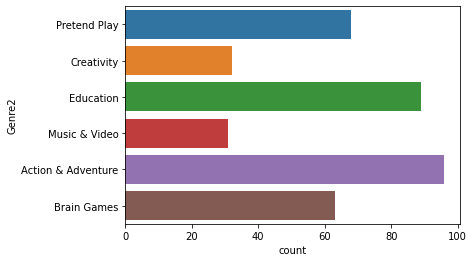

In [245]:
sns.countplot(y="Genre2", data=app_data)